In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

steps for Canny edge detection:

    Reduce noise and smoothen image,
    Calculate the gradient,
    Non-maximum suppression,
    Double the threshold,
    Linking and edge detecting – hysteresis

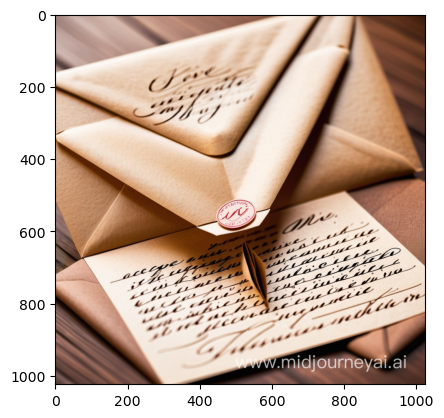

In [2]:
img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\en_app(6).png")

# Convert BGR to RGB
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

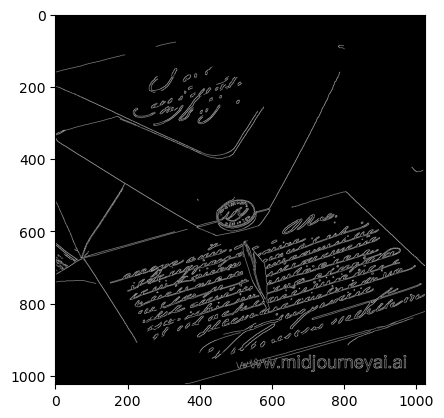

In [3]:
# Apply Canny edge detector

'''
Edge detection with canny algo
edges = cv2.Canny('/path/to/img', minVal, maxVal, apertureSize, L2gradient)  

minVal= minimu, intensity gradent

L2gradient: Its default value is false, if value is true, Canny () uses a more computationally expensive equation to 
detect edges, which provides more accuracy at the cost of resources.
'''

edges= cv2.Canny(img, 100, 200,3, L2gradient= True)

plt.imshow(edges, cmap= 'gray')

In [4]:
binary_img= np.zeros(img.shape)

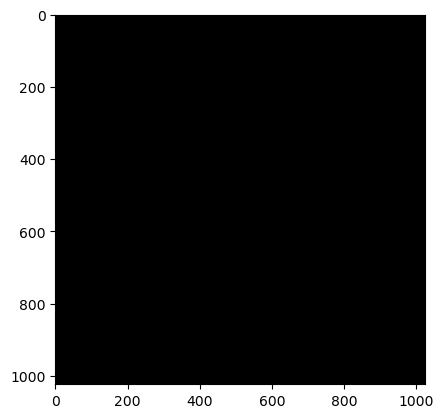

In [5]:
plt.imshow(binary_img)

### Edges with Contour

Number of Contours found = 776


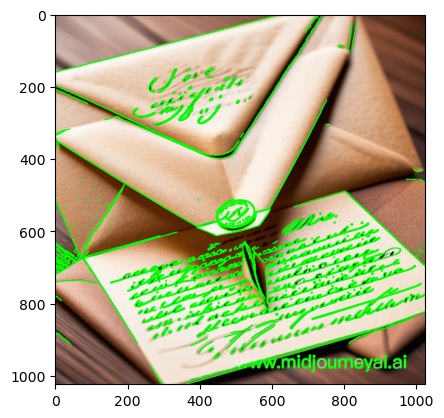

In [6]:
# convert to gray scale
gray_img= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Find Canny edges
edges= cv2.Canny(gray_img, 100, 120, 3, L2gradient= True)

# Find contour

# Make the copy of the img since findContours alters the image
img_copy= img

contours, hierarchy= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours, -1 signifies drawing contors pn the img
cv2.drawContours(img_copy, contours, -1, (0,255,0),2)
plt.imshow(img_copy, cmap='gray')
cv2.waitKey(0)

cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


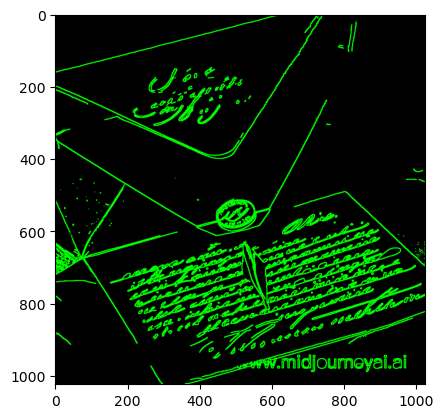

In [7]:
cv2.drawContours(binary_img, contours, -1, (0,255,0),2)
plt.imshow(binary_img)


In [8]:
# img_copy= cv2.resize(img_copy, (400, 400))
# binary_img= cv2.resize(binary_img, (400, 400))

# hori= np.concatenate((img_copy, binary_img), axis=1)
# cv2.imshow('hori', hori)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [9]:
img_copy.shape, binary_img.shape

((1024, 1024, 3), (1024, 1024, 3))

In [10]:
# concatenate image Horizontally 
# horiz= np.concatenate((img_copy, binary_img), axis = 0)
# cv2.imshow('Img',horiz)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
import tkinter as tk
from tkinter import filedialog

In [12]:
def createImg(img_path):
    
    # Load the image
    new_img= cv2.imread(img_path)
    
    # Resize the image
    new_img= cv2.resize(new_img, (500,500),3)
        
    # Canny Edge detection    
    img_edges= cv2.Canny(new_img, 100, 200, 2, L2gradient= True)
    
    # Contour detection
    img_contor, hierarchy= cv2.findContours(img_edges,  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    return new_img, img_contor

In [13]:
def selectImg():
    
    file_path= filedialog.askopenfilename()
    
    img_rgb, img_contor= createImg(file_path)
    cv2.drawContours(img_rgb, img_contor, -1, (0,255,0), 1)
        
    # create a binary img
    binary_img= np.zeros(img_rgb.shape)
    cv2.drawContours(binary_img, img_contor, -1, (255,0,0), 1)
    
    Hori = np.concatenate((binary_img, img_rgb), axis=1) 

    cv2.imshow('Img',Hori)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [14]:
binary_img.shape

(1024, 1024, 3)

In [17]:
# create a window

root= tk.Tk()
root.title('Edge and Conotur detection')
root.geometry('600x500')

select_button= tk.Button(root, text= 'Select Image', command= selectImg)
select_button.pack()

root.mainloop()

In [16]:
# Issue to be resolved:

# coloresImg is not getting as coloured, its showing as white display with contour